In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [2]:
data  = pd.read_csv('diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Binary Classification
data.Outcome.unique()

array([1, 0], dtype=int64)

In [7]:
X= data.drop("Outcome", axis=1)

In [8]:
y = data.Outcome

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1234)

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [11]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred_train = log_reg.predict(X_train)

In [13]:
pd.DataFrame({'Actual':y_train, 'predicted':y_pred_train})

,Actual,predicted
8,1,1
719,1,0
296,1,0
651,0,0
93,1,0
...,...,...
372,0,0
204,0,0
53,1,1
294,0,0


In [14]:
cor=0
for a,p in zip(y_train,y_pred_train):
    if a==p:
       cor+=1
        
cor   

457

In [15]:
acc = cor/len(X_train)*100
acc

79.34027777777779

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [17]:
accuracy_score(y_train,y_pred_train)

0.7934027777777778

In [18]:
confusion_matrix(y_train,y_pred_train)

array([[337,  42],
       [ 77, 120]], dtype=int64)


 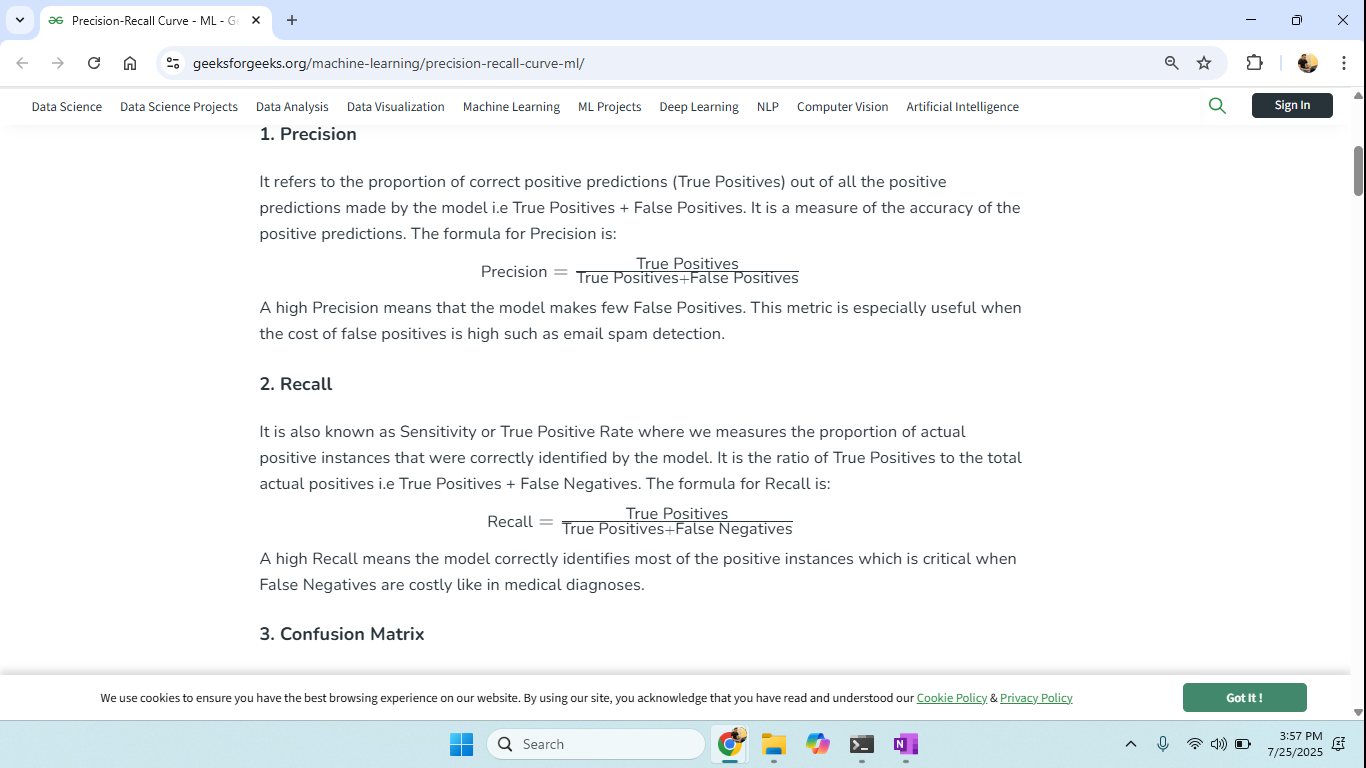



In [19]:
precision_score(y_train,y_pred_train)

0.7407407407407407

In [20]:
recall_score(y_train,y_pred_train)

0.6091370558375635

In [21]:
f1_score(y_train,y_pred_train)

0.6685236768802229

In [22]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       379
           1       0.74      0.61      0.67       197

    accuracy                           0.79       576
   macro avg       0.78      0.75      0.76       576
weighted avg       0.79      0.79      0.79       576



In [23]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [24]:
class_0 = data.groupby('Outcome').get_group(0).sample(268)

In [25]:
class_1 = data.groupby('Outcome').get_group(1).sample(268)

In [26]:
class_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
215,12,151,70,40,271,41.8,0.742,38,1
269,2,146,0,0,0,27.5,0.240,28,1
391,5,166,76,0,0,45.7,0.340,27,1
227,3,162,52,38,0,37.2,0.652,24,1
245,9,184,85,15,0,30.0,1.213,49,1
...,...,...,...,...,...,...,...,...,...
326,1,122,64,32,156,35.1,0.692,30,1
187,1,128,98,41,58,32.0,1.321,33,1
37,9,102,76,37,0,32.9,0.665,46,1
6,3,78,50,32,88,31.0,0.248,26,1


In [27]:
balanced_data = pd.concat([class_0,class_1]).sample(536)

In [28]:
balanced_data.Outcome.value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [29]:
X= balanced_data.drop("Outcome", axis=1)
y= balanced_data.Outcome

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1234)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [32]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_train_pred = log_reg.predict(X_train)

In [34]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       194
           1       0.72      0.75      0.73       208

    accuracy                           0.72       402
   macro avg       0.72      0.72      0.72       402
weighted avg       0.72      0.72      0.72       402



In [35]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [36]:
X=data.drop("Outcome",axis=1) 
y = data.Outcome

In [37]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,y = smt.fit_resample(X,y)
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1234)
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_train_pred = log_reg.predict(X_train)

In [40]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       380
           1       0.78      0.73      0.75       370

    accuracy                           0.76       750
   macro avg       0.76      0.76      0.76       750
weighted avg       0.76      0.76      0.76       750

